In [1]:
# import libraries
import os
import torch
import numpy as np
import matplotlib.pyplot as plt
from collections import deque
from unityagents import UnityEnvironment

In [2]:
# import libraries
import config
from agent import AGENT_DQN

In [3]:
# init
os.makedirs(config.SAVE_DIRECTORY, exist_ok=True)

In [4]:
# load game environment
env = UnityEnvironment(file_name=config.UNITY_ENVIRONMENT_PATH, no_graphics=config.UNITY_NO_GRAPHIC, worker_id=config.UNITY_WORKER_ID)
brain_name = env.brain_names[0]
brain = env.brains[brain_name]
env_info = env.reset(train_mode=True)[brain_name]

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [5]:
# extract game configuration
num_agents = len(env_info.agents)
state = env_info.vector_observations[0]
input_dims = len(state)
action_dims = brain.vector_action_space_size

In [6]:
# initialise modules
agent = AGENT_DQN(input_dims, action_dims)

In [7]:
# create training function
def train(n_episodes, num_agents, score_buffer=100):

    # init
    scores = []
    scores_window = deque(maxlen=score_buffer)
    
    # start training
    for eps in range(n_episodes):

        # re-init
        score = 0

        # reset env
        env_info = env.reset(train_mode=True)[brain_name]
        state = env_info.vector_observations[0]
        
        # iterating within single episode
        while True:

            # get optimal action based on latest agent policy
            action = int(agent.act(state))

            # execute action
            env_info = env.step(action)[brain_name]
            next_state = env_info.vector_observations[0]
            reward = env_info.rewards[0]
            done = env_info.local_done[0]
        
            # learn from action
            agent.step(state, action, reward, next_state, done) 

            # store rewards
            score += reward
        
            # stop iteration if it reach terminal                                                        
            if done:   
                break                                        

            # setting preparation for next iteration
            state = next_state       

        # save score into log and buffer
        scores.append(score)
        scores_window.append(score)
        print("episode: {}/{}   score: {}   average score: {}".format(eps, n_episodes, np.max(score), np.mean(scores_window)), end="\r")
        
        # stop if environment is solved
        if np.mean(scores_window) >= 13:
            print("environment solved in {} episode with average score = {}".format(eps, np.mean(scores_window)))
            torch.save(agent.model.state_dict(), '{}/dqn_model.pth'.format(config.SAVE_DIRECTORY))
            break
    
    return scores

# start training
scores_log = train(config.N_EPISODES, num_agents)

environment solved in 304 episode with average score = 13.027171757


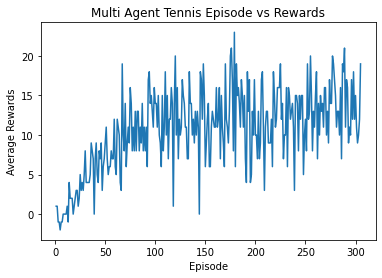

In [8]:
# plot results
x = np.arange(1, len(scores_log)+1)
y = scores_log
plt.plot(x, y)
plt.title("Multi Agent Tennis Episode vs Rewards")
plt.xlabel("Episode")
plt.ylabel("Average Rewards")
plt.show()